In [1]:
# Imports
import math
import collections

import numpy as np
import pandas as pd
import matplotlib as pp
import matplotlib.pyplot as plt

import zipfile
import os

%matplotlib inline

In [2]:
pd.options.display.max_rows = 8

In [3]:
os.getcwd()

'C:\\Users\\yaelw'

In [4]:
# Make sure to use the correct current working directory 
os.chdir('Documents/Projects/LinkedIn Learning Python Data Analysis/Ch 7 - Use Case Baby Names')
os.getcwd()

'C:\\Users\\yaelw\\Documents\\Projects\\LinkedIn Learning Python Data Analysis\\Ch 7 - Use Case Baby Names'

In [5]:
zipfile.ZipFile('names.zip').extractall('.')

In [6]:
ls

 Volume in drive C is OS
 Volume Serial Number is 6EE3-AAC3

 Directory of C:\Users\yaelw\Documents\Projects\LinkedIn Learning Python Data Analysis\Ch 7 - Use Case Baby Names

07/23/2023  02:15 PM    <DIR>          .
07/23/2023  04:31 PM    <DIR>          ..
07/23/2023  02:01 PM    <DIR>          .ipynb_checkpoints
07/23/2023  02:01 PM             3,716 07_02_loading.ipynb
07/23/2023  02:01 PM             5,213 07_03_popularity.ipynb
07/23/2023  02:01 PM             5,425 07_04_topten.ipynb
07/23/2023  02:01 PM             4,285 07_06_solution.ipynb
07/24/2023  11:57 AM         8,652,542 allyears.csv.gz
07/23/2023  02:06 PM    <DIR>          names
07/23/2023  02:01 PM         8,528,645 names.zip
               6 File(s)     17,199,826 bytes
               4 Dir(s)  350,688,301,056 bytes free


In [7]:
ls names

 Volume in drive C is OS
 Volume Serial Number is 6EE3-AAC3

 Directory of C:\Users\yaelw\Documents\Projects\LinkedIn Learning Python Data Analysis\Ch 7 - Use Case Baby Names\names

07/23/2023  02:06 PM    <DIR>          .
07/23/2023  02:15 PM    <DIR>          ..
07/24/2023  12:13 PM           316,364 NationalReadMe.pdf
07/24/2023  12:13 PM            24,933 yob1880.txt
07/24/2023  12:13 PM            24,065 yob1881.txt
07/24/2023  12:13 PM            26,559 yob1882.txt
07/24/2023  12:13 PM            26,002 yob1883.txt
07/24/2023  12:13 PM            28,670 yob1884.txt
07/24/2023  12:13 PM            28,625 yob1885.txt
07/24/2023  12:13 PM            29,822 yob1886.txt
07/24/2023  12:13 PM            29,531 yob1887.txt
07/24/2023  12:13 PM            33,064 yob1888.txt
07/24/2023  12:13 PM            32,297 yob1889.txt
07/24/2023  12:13 PM            33,621 yob1890.txt
07/24/2023  12:13 PM            33,186 yob1891.txt
07/24/2023  12:13 PM            36,542 yob1892.txt
07/24/2023  12

In [8]:
open('names/yob2011.txt', 'r').readlines()[:10]

['Sophia,F,21842\n',
 'Isabella,F,19910\n',
 'Emma,F,18803\n',
 'Olivia,F,17322\n',
 'Ava,F,15503\n',
 'Emily,F,14258\n',
 'Abigail,F,13248\n',
 'Madison,F,12389\n',
 'Mia,F,11530\n',
 'Chloe,F,10991\n']

In [9]:
pd.read_csv('names/yob2011.txt')

,Sophia,F,21842
0,Isabella,F,19910
1,Emma,F,18803
2,Olivia,F,17322
3,Ava,F,15503
...,...,...,...
33903,Zylas,M,5
33904,Zyran,M,5
33905,Zyshawn,M,5
33906,Zytavion,M,5


Here we see that the first cell in the file, Sophia, autmatically becomes a column head.

Since we want the column head to be "name," and "Sophia" should be one of the names listed, we need to explicitly state the column name ourselves

In [10]:
pd.read_csv('names/yob2011.txt', names=['name','sex','number'])

,name,sex,number
0,Sophia,F,21842
1,Isabella,F,19910
2,Emma,F,18803
3,Olivia,F,17322
...,...,...,...
33904,Zylas,M,5
33905,Zyran,M,5
33906,Zyshawn,M,5
33907,Zytavion,M,5


If we want data from a certain year, like 2011 for example, we can assign it.

In [11]:
pd.read_csv('names/yob2011.txt', names=['name','sex','number']).assign(year=2011)

,name,sex,number,year
0,Sophia,F,21842,2011
1,Isabella,F,19910,2011
2,Emma,F,18803,2011
3,Olivia,F,17322,2011
...,...,...,...,...
33904,Zylas,M,5,2011
33905,Zyran,M,5,2011
33906,Zyshawn,M,5,2011
33907,Zytavion,M,5,2011


In [12]:
# Build a data frame
# loop between years 1880-2018, build up filename using f string
# feed it to read_csv, specifiy column names, add column that gives correct year, finally we concat

allyears = pd.concat(pd.read_csv(f'names/yob{year}.txt', names=['name','sex','number']).assign(year=year)
                     for year in range(1880,2019))
                     

In [13]:
allyears.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1957046 entries, 0 to 32032
Data columns (total 4 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   name    object
 1   sex     object
 2   number  int64 
 3   year    int64 
dtypes: int64(2), object(2)
memory usage: 74.7+ MB


In [14]:
allyears.year.min(), allyears.year.max()

(1880, 2018)

In [15]:
allyears.to_csv('allyears.csv.gz', index=False)

## Name Populartiy

In [16]:
allyears = pd.read_csv('allyears.csv.gz')

In [17]:
allyears

,name,sex,number,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
...,...,...,...,...
1957042,Zyran,M,5,2018
1957043,Zyrie,M,5,2018
1957044,Zyron,M,5,2018
1957045,Zzyzx,M,5,2018


In [18]:
allyears_indexed = allyears.set_index(['sex','name','year']).sort_index()

Now we can get the indexing for any name, like 'Mary', for example.

In [19]:
allyears_indexed.loc[('F','Mary')]

,number
year,
1880,7065
1881,6919
1882,8148
1883,8012
...,...
2015,2631
2016,2508
2017,2402
2018,2327


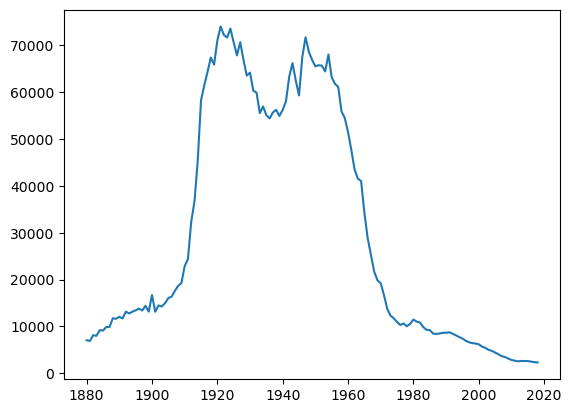

In [20]:
plt.plot(allyears_indexed.loc[('F','Mary')])

This plot displays the frequency of the baby name "Mary" being used over time.
However, frequency alone is not a sole indicator of populatriy. For instance, there could have been a baby boom which would likley increase frequency of a given name, but would not necessarily increase its popularity, as it could just as likely increase the frequnecy of many other baby names. 

If we want to look at popularity, we take the frequency of a given name, such as "Mary," as fraction of number of babies born in a year.

C:\Users\yaelw\AppData\Local\Temp\ipykernel_44700\3963796701.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  plt.plot(allyears_indexed.loc[('F','Mary')] / allyears.groupby('year').sum())


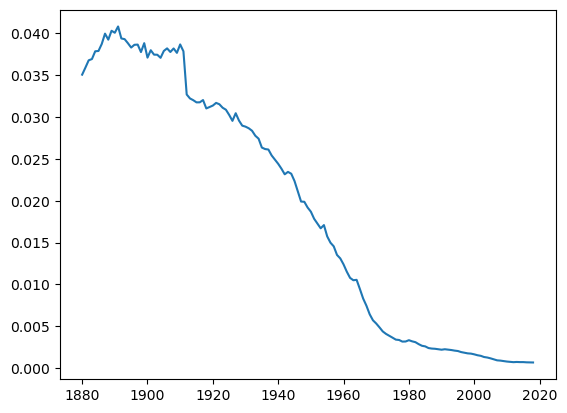

In [21]:
plt.plot(allyears_indexed.loc[('F','Mary')] / allyears.groupby('year').sum())

This plot reveals that popularity goes down over time, even though the previous plot reveals that at certain points in time, the frequency of the baby name "Mary" goes up.

### A few helpful functions

The following function plots the frequency of a name over time when given a sex and a name.

In [22]:
def plotname(sex, name):
    data = allyears_indexed.loc[(sex,name)]
    
    plt.plot(data.index, data.values, label=name)
    plt.axis(xmin=1880, xmax=2018)

The following function uses the above function to plot the frequency over time of multiple baby names.

In [23]:
def comparenames(sex, names):
    plt.figure(figsize=(12,2.5))
    
    for name in names:
        plotname(sex, name)
        
    plt.legend()

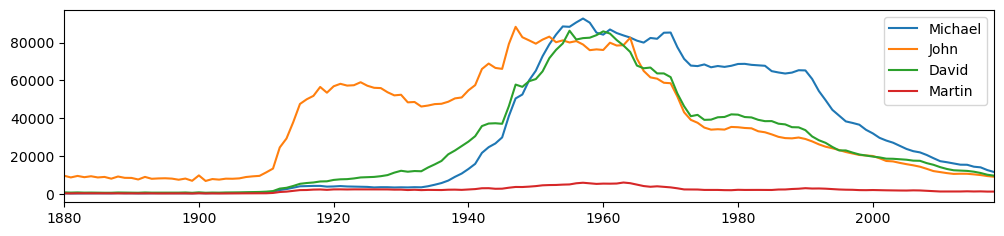

In [24]:
comparenames('M', ['Michael', 'John', 'David', 'Martin'])

This chart displays the frequency of the names "Michael", "John", "David", and "Martin" from 1880 to 2018.

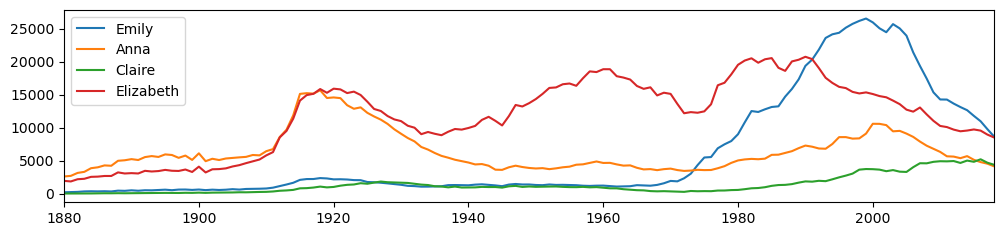

In [25]:
comparenames('F', ['Emily', 'Anna', 'Claire', 'Elizabeth'])

This chart displays the frequency of the names "Emily", "Anna", "Claire", and "Elizabeth" from 1880 to 2018.

#### Name Variants
With certain names, like "Claire", for example, there may be different variants which we may want to compare.

In [26]:
claires = ['Claire', 'Clare', 'Clara', 'Chiara', 'Ciara']

Here, we will compare the frequency of different 'Claire' variants over time.

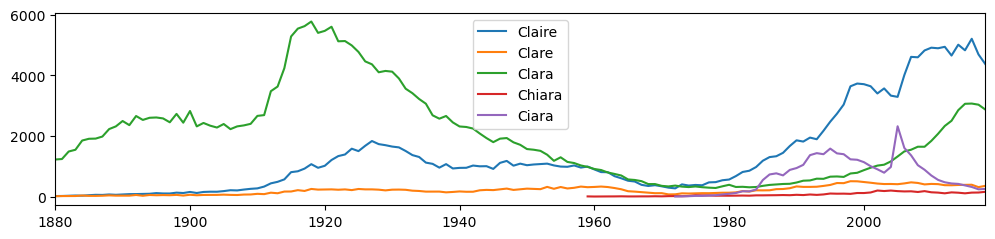

In [27]:
comparenames('F', claires)

Here we have a stacked plot that adds the counts on top of each other.
We need to compare time though, so we will use indexing. 

In [28]:
allyears_indexed.loc[('F', claires),:]

number
sex name   year        
F   Claire 1880      21
           1881      23
           1882      30
           1883      38
...                 ...
    Ciara  2015     372
           2016     321
           2017     243
           2018     256

[522 rows x 1 columns]

In [29]:
allyears_indexed.loc[('F',claires),:].unstack(level=2)

number                                                          \
year          1880    1881    1882    1883    1884    1885    1886    1887   
sex name                                                                     
F   Claire    21.0    23.0    30.0    38.0    33.0    49.0    61.0    58.0   
    Clare     15.0    20.0    21.0    22.0    38.0    27.0    26.0    31.0   
    Clara   1226.0  1242.0  1490.0  1548.0  1852.0  1910.0  1916.0  1984.0   
    Chiara     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
    Ciara      NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   

                            ...                                          \
year          1888    1889  ...    2009    2010    2011    2012    2013   
sex name                    ...                                           
F   Claire    73.0    62.0  ...  4824.0  4915.0  4896.0  4944.0  4656.0   
    Clare     43.0    34.0  ...   405.0   421.0   414.0   379.0   377.0   
    Clara   2230.0  2319.0  ...  1647.0  1840.0  2074.0  2333.0  2504.0   
    Chiara     NaN     NaN  ...   183.0   145.0   134.0   111.0   142.0   
    Ciara      NaN     NaN  ...   888.0   699.0   554.0   475.0   436.0   

                                                    
year          2014    2015    2016    2017    2018  
sex name                                            
F   Claire  5014.0  4829.0  5209.0  4693.0  4379.0  
    Clare    386.0   389.0   394.0   315.0   357.0  
    Clara   2854.0  3064.0  3072.0  3035.0  2877.0  
    Chiara   131.0   111.0   134.0   137.0   160.0  
    Ciara    422.0   372.0   321.0   243.0   256.0  

[5 rows x 139 columns]

In [30]:
allyears_indexed.loc[('F',claires),:].unstack(level=1)

number                             
name      Claire  Clare   Clara Chiara  Ciara
sex year                                     
F   1880    21.0   15.0  1226.0    NaN    NaN
    1881    23.0   20.0  1242.0    NaN    NaN
    1882    30.0   21.0  1490.0    NaN    NaN
    1883    38.0   22.0  1548.0    NaN    NaN
...          ...    ...     ...    ...    ...
    2015  4829.0  389.0  3064.0  111.0  372.0
    2016  5209.0  394.0  3072.0  134.0  321.0
    2017  4693.0  315.0  3035.0  137.0  243.0
    2018  4379.0  357.0  2877.0  160.0  256.0

[139 rows x 5 columns]

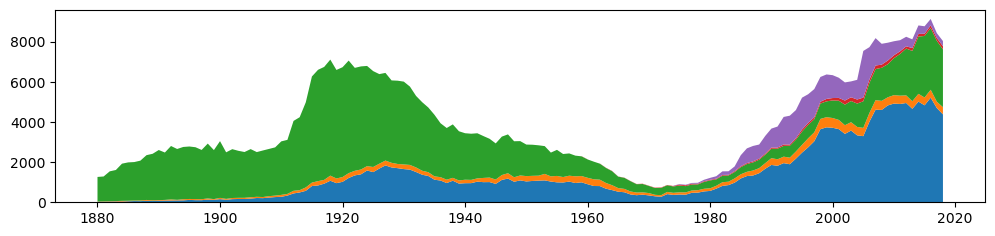

In [31]:
plt.figure(figsize=(12,2.5))
plt.stackplot(range(1880,2019),
              allyears_indexed.loc[('F',claires),:].unstack(level=2));

## Top ten names

In [32]:
pd.options.display.max_rows = 10

In [33]:
allyears = pd.read_csv('allyears.csv.gz')

In [34]:
# index by sex and year only
allyears_byyear = allyears.set_index(['sex','year']).sort_index()

#### Male names in 2018

In [35]:
allyears_byyear.loc['M',2018].sort_values('number', ascending=False)

name  number
sex year                 
M   2018     Liam   19837
    2018     Noah   18267
    2018  William   14516
    2018    James   13525
    2018   Oliver   13389
...           ...     ...
    2018   Gaylon       5
    2018   Gavynn       5
    2018    Gavon       5
    2018   Gaurav       5
    2018    Zzyzx       5

[14004 rows x 2 columns]

In [36]:
# head gives us the top ten
allyears_byyear.loc['M',2018].sort_values('number', ascending=False).head(10)

name  number
sex year                  
M   2018      Liam   19837
    2018      Noah   18267
    2018   William   14516
    2018     James   13525
    2018    Oliver   13389
    2018  Benjamin   13381
    2018    Elijah   12886
    2018     Lucas   12585
    2018     Mason   12435
    2018     Logan   12352

#### Female names in 2018

In [37]:
allyears_byyear.loc['F',2018].sort_values('number', ascending=False)

name  number
sex year                   
F   2018       Emma   18688
    2018     Olivia   17921
    2018        Ava   14924
    2018   Isabella   14464
    2018     Sophia   13928
...             ...     ...
    2018      Ghala       5
    2018     Ghalia       5
    2018  Ghislaine       5
    2018     Giahna       5
    2018      Zyona       5

[18029 rows x 2 columns]

In [38]:
allyears_byyear.loc['M',2018].sort_values('number', ascending=False).head(10).reset_index().name

0        Liam
1        Noah
2     William
3       James
4      Oliver
5    Benjamin
6      Elijah
7       Lucas
8       Mason
9       Logan
Name: name, dtype: object

In [39]:
def getyear(sex, year):
    return (allyears_byyear.loc[sex, year]          # select M/F, year
            .sort_values('number', ascending=False) # sort by most common
            .head(10)                               # only ten
            .reset_index()                          # lose the index
            .name)                                  # return a name-only series



In [40]:
pd.DataFrame({year: getyear('M', year) for year in range(2010,2019)})

,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Jacob,Jacob,Jacob,Noah,Noah,Noah,Noah,Liam,Liam
1,Ethan,Mason,Mason,Jacob,Liam,Liam,Liam,Noah,Noah
2,Michael,William,Ethan,Liam,Mason,Mason,William,William,William
3,Jayden,Jayden,Noah,Mason,Jacob,Jacob,Mason,James,James
4,William,Noah,William,William,William,William,James,Logan,Oliver
5,Alexander,Michael,Liam,Ethan,Ethan,Ethan,Benjamin,Benjamin,Benjamin
6,Noah,Ethan,Michael,Michael,Michael,James,Jacob,Mason,Elijah
7,Daniel,Alexander,Jayden,Alexander,Alexander,Alexander,Michael,Elijah,Lucas
8,Aiden,Aiden,Alexander,Jayden,James,Michael,Elijah,Oliver,Mason
9,Anthony,Daniel,Aiden,Daniel,Daniel,Benjamin,Ethan,Jacob,Logan


In [41]:
pd.DataFrame({year: getyear('F', year) for year in range(2010,2019)})

,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Isabella,Sophia,Sophia,Sophia,Emma,Emma,Emma,Emma,Emma
1,Sophia,Isabella,Emma,Emma,Olivia,Olivia,Olivia,Olivia,Olivia
2,Emma,Emma,Isabella,Olivia,Sophia,Sophia,Ava,Ava,Ava
3,Olivia,Olivia,Olivia,Isabella,Isabella,Ava,Sophia,Isabella,Isabella
4,Ava,Ava,Ava,Ava,Ava,Isabella,Isabella,Sophia,Sophia
5,Emily,Emily,Emily,Mia,Mia,Mia,Mia,Mia,Charlotte
6,Abigail,Abigail,Abigail,Emily,Emily,Abigail,Charlotte,Charlotte,Mia
7,Madison,Madison,Mia,Abigail,Abigail,Emily,Abigail,Amelia,Amelia
8,Chloe,Mia,Madison,Madison,Madison,Charlotte,Emily,Evelyn,Harper
9,Mia,Chloe,Elizabeth,Elizabeth,Charlotte,Harper,Harper,Abigail,Evelyn


In [42]:
def plotname(sex, name):
    data = allyears.query('sex == @sex and name == @name')
    
    plt.plot(data.year, data.number, label=name)
    plt.axis(xmin=1880, xmax=2018)

#### Top ten popular female names

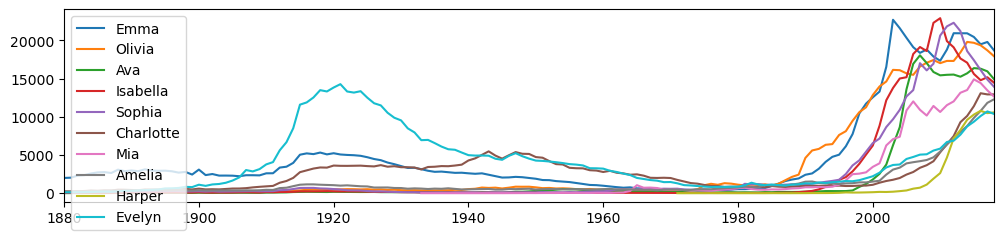

In [43]:
plt.figure(figsize=(12,2.5))

for name in getyear('F',2018):
    plotname('F', name)

plt.legend()

Almost all of the top ten baby girl names have surged in more recent years, other than Evelyn, which surged in the 1920's.

#### Top ten most popular male names

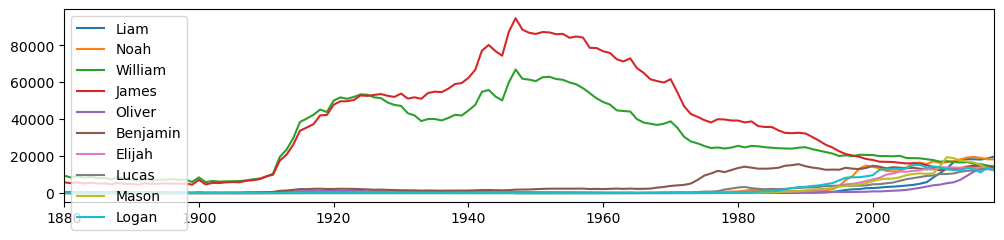

In [44]:
plt.figure(figsize=(12,2.5))

for name in getyear('M',2018):
    plotname('M',name)
    
plt.legend()

Over the years, the names "William" and "James" are very high, specifically throughout the 20th century. 

Since they dominate the chart, we want to be able to visulaize the rest of the names without these two.
We will exclude them by explicitly calling the other names.

In [45]:
list(getyear('M',2018))

['Liam',
 'Noah',
 'William',
 'James',
 'Oliver',
 'Benjamin',
 'Elijah',
 'Lucas',
 'Mason',
 'Logan']

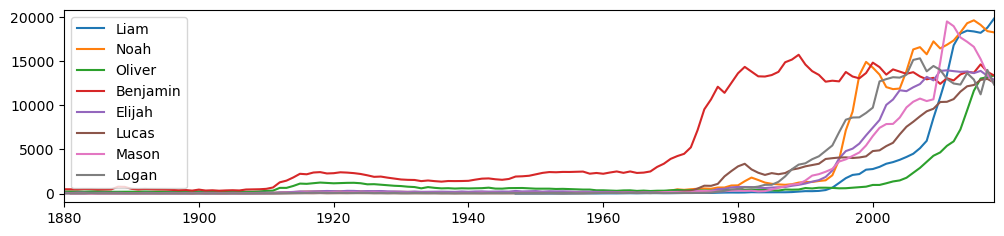

In [46]:
plt.figure(figsize=(12,2.5))

for name in ['Liam', 'Noah', 'Oliver', 'Benjamin', 'Elijah', 'Lucas', 'Mason', 'Logan']:
    plotname('M', name)
    
plt.legend()

Exluding "William" and "James," the most popular names in 2018 are names that have become popular in more recent years.

#### All time favorites, by female

In [47]:
alltime_f = allyears_byyear.loc['F'].groupby('name').sum().sort_values('number', ascending=False).head(10)

In [48]:
alltime_f

,number
name,
Mary,4125675
Elizabeth,1638349
Patricia,1572016
Jennifer,1467207
Linda,1452668
Barbara,1434397
Margaret,1248985
Susan,1121703
Dorothy,1107635


### Popularity over time


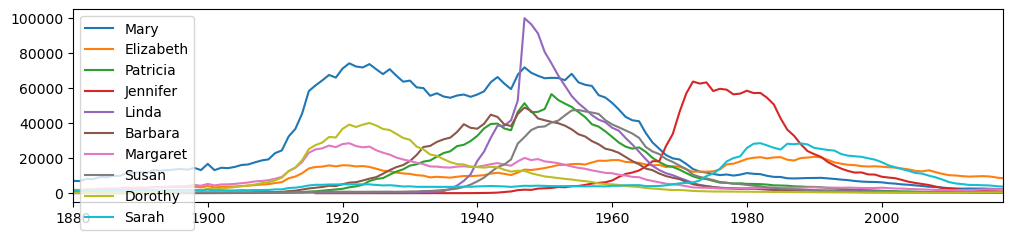

In [49]:
plt.figure(figsize=(12,2.5))

for name in alltime_f.index: #looping over index, rather than value
    plotname('F', name)

plt.legend()

Other than "Jennifer," the all time most popular girl names have gained their popularity in the first half of the 20th century.

"Jennifer", however, gained its popularity in the 1980's.

## Unisex names
What are the top ten most common unisex names for both males and females over time?

In [50]:
#original dataframe
allyears = pd.read_csv('allyears.csv.gz')

In [51]:
# total number of boys and girls for a given name 
totals = allyears.groupby(['sex','name']).number.sum()
# groupby segments the data before applying an aggregation (in this case, sum of the number of babies) 

In [52]:
totals

sex  name     
F    Aabha        35
     Aabidah       5
     Aabriella    38
     Aada         13
     Aadaya        8
                  ..
M    Zyus         11
     Zyvion        5
     Zyvon         7
     Zyyon         6
     Zzyzx        10
Name: number, Length: 109173, dtype: int64

In [53]:
# separation of male and female names
male, female = totals.loc['M'], totals.loc['F']

In [54]:
male

name
Aaban     114
Aabid      16
Aabir      10
Aadam     273
Aadan     130
         ... 
Zyus       11
Zyvion      5
Zyvon       7
Zyyon       6
Zzyzx      10
Name: number, Length: 41475, dtype: int64

In [55]:
female

name
Aabha        35
Aabidah       5
Aabriella    38
Aada         13
Aadaya        8
             ..
Zyrielle     27
Zyrihanna    45
Zyriyah      16
Zyva         23
Zyyanna       6
Name: number, Length: 67698, dtype: int64

In [56]:
# the two series are separate but we can combine them togethter
# pandas will align the indices for us
totals.loc['M'] / totals.loc['F'] < 2

name
Aaban      False
Aabha      False
Aabid      False
Aabidah    False
Aabir      False
           ...  
Zyvion     False
Zyvon      False
Zyyanna    False
Zyyon      False
Zzyzx      False
Name: number, Length: 98400, dtype: bool

In [57]:
ratios = (totals.loc['M'] / totals.loc['F']).dropna()

To define what it means for a name to be "unisex", we will say that the ratio of the male usage for a given name to the female usage for a given name is >0.5 and <2. 

In [58]:
ratios[(ratios > 0.5) & (ratios < 2)]

name
Aalijah    1.422819
Aamari     1.430233
Aari       1.111111
Aarin      1.950331
Aaris      1.000000
             ...   
Ziyan      1.251748
Zoel       1.928571
Zohar      0.520270
Zyian      0.714286
Zyrie      0.842105
Name: number, Length: 1660, dtype: float64

In [59]:
# we take index because we want just the names, and not the ratios themselves
unisex = ratios[(ratios > 0.5) & (ratios < 2)].index

In [60]:
unisex

Index(['Aalijah', 'Aamari', 'Aari', 'Aarin', 'Aaris', 'Aaryn', 'Aavyn', 'Abey',
       'Abrar', 'Abriel',
       ...
       'Zell', 'Zi', 'Ziel', 'Zihan', 'Zixuan', 'Ziyan', 'Zoel', 'Zohar',
       'Zyian', 'Zyrie'],
      dtype='object', name='name', length=1660)

#### Most common unisex names

In [61]:
common = (male.loc[unisex] + female.loc[unisex]).sort_values(ascending=False).head(10)

In [62]:
common

name
Jessie     277674
Riley      201179
Casey      186947
Jackie     169199
Peyton     120657
Jaime      117885
Kerry       98195
Kendall     93317
Jody        86971
Frankie     74325
Name: number, dtype: int64

In [63]:
# use a fully indexed frame to plot popularity
allyears_indexed = allyears.set_index(['sex','name','year']).sort_index()

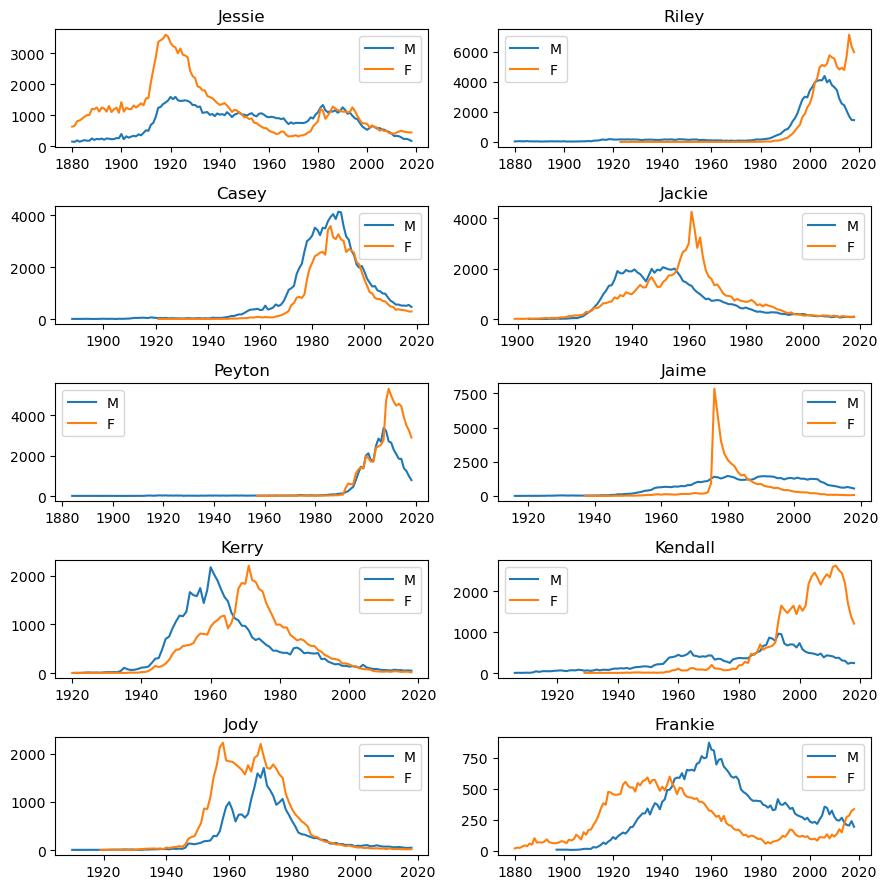

In [64]:
plt.figure(figsize=(9,9))

for i, name in enumerate(common.index): #loop over most common unisex names (which is the index of the most common series)
    plt.subplot(5,2,i+1) 
    # plot by selecting male or female in the name
    plt.plot(allyears_indexed.loc['M',name], label='M') 
    plt.plot(allyears_indexed.loc['F',name], label='F')
    
    plt.legend()
    plt.title(name)
    
plt.tight_layout()

### Insights from the charts
* While "Jessie" is the total most popular unisex name, it has become less popular over time
* Over time, "Riley" has become more popular for females, but has gone down for males
* "Casey" may be the "most unisex" name because its popularity for boys and girls track very closely over time